In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
import numpy as np
from statistics import mode
import calendar

In [6]:
df_validation = pd.read_csv(r'../../data/tidy/energy-validation-april2022-31march-without-outliers.csv', delimiter=',', skiprows=0, low_memory=False)

In [7]:
#df_validation

In [8]:
# Remove rows with negative validation data
df_validation=df_validation.loc[df_validation['gallons']>0]

In [9]:
df_validation

,Unnamed: 0,timestamp,equipment_id,gallons,date,Powertrain
0,58909,3/31/2022 0:11,3310,33.10,3/31/2022,conventional
1,58910,3/31/2022 0:17,3303,6.40,3/31/2022,conventional
2,58911,3/31/2022 0:25,3320,12.40,3/31/2022,conventional
3,58912,3/31/2022 0:41,3402,34.80,3/31/2022,hybrid
4,58913,3/31/2022 0:49,3226,39.40,3/31/2022,conventional
...,...,...,...,...,...,...
3046,59563,4/30/2022 22:52,3228,20.90,4/30/2022,conventional
3047,24290,4/30/2022 22:53,1862,41.22,4/30/2022,conventional
3048,59564,4/30/2022 23:29,3314,23.50,4/30/2022,conventional
3049,59565,4/30/2022 23:43,3401,40.60,4/30/2022,hybrid


In [10]:
df_validation.sort_values(by=['equipment_id','timestamp'], inplace=True)

In [11]:
df_validation.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
#df_model

In [13]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [14]:
#df_model
df_model.drop(['Unnamed: 0'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.2'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.3'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.4'], axis=1, inplace=True)

In [15]:
df_model.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [16]:
df_model.columns

Index(['ServiceDateTime', 'DateKey', 'CalendarDate', 'Year', 'Month', 'OpKey',
       'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName', 'TripKey', 'Trip',
       'StopKey', 'Stop', 'StopName', 'Lat', 'Lon', 'Vehicle', 'VehicleType',
       'SeatedCap', 'TotalCap', 'Boards', 'Alights', 'Onboard', 'Bike',
       'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second', 'Date', 'Daytype',
       'time', 'time_delta', 'time_delta_in_seconds', 'dist', 'Speed',
       'Acceleration', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'elevation', 'grade', 'Energy'],
      dtype='object')

In [17]:
df_validation.rename(columns={"timestamp": "ServiceDateTime","equipment_id":"Vehicle"}, inplace=True)

In [18]:
df_validation_vehicles=df_validation['Vehicle'].unique()

In [19]:
df_model_vehicles=df_model['Vehicle'].unique()

In [20]:
#df_validation.head(100)

In [21]:
df_validation["dist"] = np.nan
df_validation["Energy"] = np.nan
df_validation["VehicleModel"] = np.nan
df_validation["Onboard"] = np.nan

In [22]:
df_validation.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [23]:
df_validation['ServiceDateTime'] = pd.to_datetime(df_validation['ServiceDateTime'])

In [24]:
df_model['ServiceDateTime']=pd.to_datetime(df_model['ServiceDateTime'])

In [25]:
df_validation['ServiceDateTime']=pd.to_datetime(df_validation['ServiceDateTime'])

In [26]:
df_validation.dtypes

ServiceDateTime    datetime64[ns]
Vehicle                     int64
gallons                   float64
date                       object
Powertrain                 object
dist                      float64
Energy                    float64
VehicleModel              float64
Onboard                   float64
dtype: object

In [27]:
df_validation.sort_values(by=['Vehicle','ServiceDateTime'])

,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,Onboard
2644,2022-04-27 17:39:00,1320,0.68,4/27/2022,electric,NaN,NaN,NaN,NaN
2902,2022-04-29 18:56:00,1320,0.69,4/29/2022,electric,NaN,NaN,NaN,NaN
1747,2022-04-18 18:24:00,1321,1.83,4/18/2022,electric,NaN,NaN,NaN,NaN
1844,2022-04-19 17:56:00,1321,0.58,4/19/2022,electric,NaN,NaN,NaN,NaN
2897,2022-04-29 18:47:00,1321,0.66,4/29/2022,electric,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2422,2022-04-25 18:43:00,7902,24.60,4/25/2022,hybrid,NaN,NaN,NaN,NaN
2561,2022-04-26 20:14:00,7902,12.20,4/26/2022,hybrid,NaN,NaN,NaN,NaN
2641,2022-04-27 17:23:00,7902,23.80,4/27/2022,hybrid,NaN,NaN,NaN,NaN
2861,2022-04-29 06:56:00,7902,19.00,4/29/2022,hybrid,NaN,NaN,NaN,NaN


In [28]:
df_validation=df_validation.reset_index()

In [29]:
df_validation.head(20)

,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,Onboard
0,2644,2022-04-27 17:39:00,1320,0.68,4/27/2022,electric,NaN,NaN,NaN,NaN
1,2902,2022-04-29 18:56:00,1320,0.69,4/29/2022,electric,NaN,NaN,NaN,NaN
2,1747,2022-04-18 18:24:00,1321,1.83,4/18/2022,electric,NaN,NaN,NaN,NaN
3,1844,2022-04-19 17:56:00,1321,0.58,4/19/2022,electric,NaN,NaN,NaN,NaN
4,2897,2022-04-29 18:47:00,1321,0.66,4/29/2022,electric,NaN,NaN,NaN,NaN
5,68,2022-03-31 19:33:00,1322,0.49,3/31/2022,electric,NaN,NaN,NaN,NaN
6,1775,2022-04-18 19:48:00,1322,0.50,4/18/2022,electric,NaN,NaN,NaN,NaN
7,1776,2022-04-18 19:49:00,1322,0.46,4/18/2022,electric,NaN,NaN,NaN,NaN
8,2792,2022-04-28 19:30:00,1322,0.51,4/28/2022,electric,NaN,NaN,NaN,NaN
9,173,2022-04-01 18:59:00,1323,0.53,4/1/2022,electric,NaN,NaN,NaN,NaN


In [30]:
df_integrated_diesel = df_validation[(df_validation.Powertrain != 'electric')]

In [31]:
df_integrated_diesel=df_integrated_diesel.reset_index()

In [32]:
for i in df_integrated_diesel.index:
    dist_current=0
    if i==0:
        pass 
    else:
        if df_integrated_diesel['Vehicle'][i]==df_integrated_diesel['Vehicle'][i-1]:
            df_filtered=df_model.loc[(df_model['Vehicle']==df_integrated_diesel['Vehicle'][i])&(df_integrated_diesel['ServiceDateTime'][i-1]<df_model['ServiceDateTime'])&(df_model['ServiceDateTime']<df_integrated_diesel['ServiceDateTime'][i])]
            df_integrated_diesel.loc[i,'dist']=df_filtered['dist'].sum()
            df_integrated_diesel.loc[i,'Energy']=df_filtered['Energy'].sum()
            df_integrated_diesel.loc[i,'Onboard']=df_filtered['Onboard'].sum()
            df_filtered=df_filtered.reset_index()
            #df_integrated_diesel.loc[i,'VehicleModel']=df_filtered['VehicleModel'].mode()
            #df_integrated_diesel.loc[i,'VehicleModel']=df_filtered.groupby(by='Vehicle')['VehicleModel'].mode()
        else:
            pass

In [33]:
df_integrated_diesel

,level_0,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,Onboard
0,44,84,2022-03-31 20:49:00,1552,80.30,3/31/2022,conventional,NaN,NaN,NaN,NaN
1,45,136,2022-04-01 15:34:00,1552,27.43,4/1/2022,conventional,53.128981,18.357928,NaN,1403.0
2,46,1086,2022-04-11 19:10:00,1552,30.32,4/11/2022,conventional,533.356239,140.444845,NaN,6983.0
3,47,1310,2022-04-13 19:03:00,1552,71.53,4/13/2022,conventional,168.553686,46.366763,NaN,1761.0
4,48,1473,2022-04-14 22:32:00,1552,56.92,4/14/2022,conventional,187.883360,41.599706,NaN,3040.0
...,...,...,...,...,...,...,...,...,...,...,...
2997,3046,2561,2022-04-26 20:14:00,7902,12.20,4/26/2022,hybrid,122.690728,26.381711,NaN,2445.0
2998,3047,2641,2022-04-27 17:23:00,7902,23.80,4/27/2022,hybrid,87.466541,18.232634,NaN,2001.0
2999,3048,2861,2022-04-29 06:56:00,7902,19.00,4/29/2022,hybrid,109.002254,44.079260,NaN,1456.0
3000,3049,2982,2022-04-30 11:06:00,7902,26.10,4/30/2022,hybrid,90.760542,38.124774,NaN,2363.0


In [34]:
### Matching Vehicle models

In [35]:
model = pd.read_csv(r'../../data/tidy/vehicles-summary.csv', delimiter=',', skiprows=0, low_memory=False)

In [36]:
mydict = model.groupby('Model')['Equipment ID'].agg(list).to_dict()

In [37]:
d = {val:key for key, lst in mydict.items() for val in lst}
df_integrated_diesel['VehicleModel'] = df_integrated_diesel['Vehicle'].map(d)

In [38]:
df_integrated_diesel

,level_0,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,Onboard
0,44,84,2022-03-31 20:49:00,1552,80.30,3/31/2022,conventional,NaN,NaN,Gillig 35,NaN
1,45,136,2022-04-01 15:34:00,1552,27.43,4/1/2022,conventional,53.128981,18.357928,Gillig 35,1403.0
2,46,1086,2022-04-11 19:10:00,1552,30.32,4/11/2022,conventional,533.356239,140.444845,Gillig 35,6983.0
3,47,1310,2022-04-13 19:03:00,1552,71.53,4/13/2022,conventional,168.553686,46.366763,Gillig 35,1761.0
4,48,1473,2022-04-14 22:32:00,1552,56.92,4/14/2022,conventional,187.883360,41.599706,Gillig 35,3040.0
...,...,...,...,...,...,...,...,...,...,...,...
2997,3046,2561,2022-04-26 20:14:00,7902,12.20,4/26/2022,hybrid,122.690728,26.381711,NEW FLYER XDE60 (ARTIC),2445.0
2998,3047,2641,2022-04-27 17:23:00,7902,23.80,4/27/2022,hybrid,87.466541,18.232634,NEW FLYER XDE60 (ARTIC),2001.0
2999,3048,2861,2022-04-29 06:56:00,7902,19.00,4/29/2022,hybrid,109.002254,44.079260,NEW FLYER XDE60 (ARTIC),1456.0
3000,3049,2982,2022-04-30 11:06:00,7902,26.10,4/30/2022,hybrid,90.760542,38.124774,NEW FLYER XDE60 (ARTIC),2363.0


In [39]:
df_integrated_diesel['VehicleModel'].unique()

array(['Gillig 35', 'Gillig 40', 'NEW FLYER XD35', 'NEW FLYER XDE40',
       'NEW FLYER XD40', 'NEW FLYER XDE60 (ARTIC)'], dtype=object)

In [40]:
df_integrated_diesel['Energy'].fillna(0, inplace=True)

In [41]:
df_integrated_diesel['VehicleModel'].unique()

array(['Gillig 35', 'Gillig 40', 'NEW FLYER XD35', 'NEW FLYER XDE40',
       'NEW FLYER XD40', 'NEW FLYER XDE60 (ARTIC)'], dtype=object)

In [53]:
df_integrated_diesel = df_integrated_diesel[df_integrated_diesel['Energy']!=0].copy()

In [55]:
df_integrated_diesel['ServiceDateTime']= pd.to_datetime(df_integrated_diesel['ServiceDateTime'])
df_integrated_diesel.sort_values(by=['Vehicle','ServiceDateTime'], ascending=True, inplace=True)

In [56]:
vehicles=df_integrated_diesel['Vehicle'].unique()

In [57]:
df_integrated_diesel_modified = pd.DataFrame(columns=['ServiceDateTime', 'Vehicle', 'gallons', 'date', 'Powertrain', 'dist','Energy','VehicleModel','Onboard','time'])
for v in vehicles:
    df1_vehicle = df_integrated_diesel.loc[(df_integrated_diesel["Vehicle"] == v)].copy()
    df1_vehicle.sort_values(by=['ServiceDateTime'], ascending=True, inplace=True)
    df1_vehicle['time_delta'] = (df1_vehicle['ServiceDateTime']-df1_vehicle['ServiceDateTime'].shift())
    df_integrated_diesel_modified=pd.concat([df_integrated_diesel_modified, df1_vehicle])

In [59]:
df_integrated_diesel_modified['time_delta_in_hours'] = df_integrated_diesel_modified['time_delta'].dt.total_seconds()/3600

In [60]:
df_integrated_diesel=df_integrated_diesel_modified.copy()

In [69]:
df_integrated_diesel['dist'] = df_integrated_diesel['dist'].astype(float)
df_integrated_diesel['Energy'] = df_integrated_diesel['Energy'].astype(float)

In [71]:
df_integrated_diesel['date'].unique()

array(['4/1/2022', '4/6/2022', '4/7/2022', '4/11/2022', '4/13/2022',
       '4/14/2022', '4/19/2022', '4/20/2022', '4/21/2022', '4/22/2022',
       '4/23/2022', '4/25/2022', '4/27/2022', '4/30/2022', '4/4/2022',
       '4/5/2022', '4/8/2022', '4/9/2022', '4/12/2022', '4/15/2022',
       '4/18/2022', '4/10/2022', '4/26/2022', '4/29/2022', '4/16/2022',
       '4/28/2022', '4/2/2022', '4/17/2022', '4/24/2022', '4/3/2022'],
      dtype=object)

In [77]:
#train_dates=['2022-04-01','2022-04-02','2022-04-03','2022-04-04','2022-04-05','2022-04-06','2022-04-07','2022-04-08','2022-04-09','2022-04-10','2022-04-11','2022-04-12','2022-04-13', '2022-04-14','2022-04-15','2022-04-16','2022-04-17','2022-04-18','2022-04-19','2022-04-20','2022-04-21','2022-04-22','2022-04-23']
train_dates=['4/1/2022', '4/6/2022', '4/7/2022', '4/11/2022', '4/13/2022',
       '4/14/2022', '4/19/2022', '4/20/2022', '4/21/2022', '4/22/2022',
       '4/23/2022', '4/4/2022',
       '4/5/2022', '4/8/2022', '4/9/2022', '4/12/2022', '4/15/2022',
       '4/18/2022', '4/10/2022', '4/16/2022',
       '4/2/2022', '4/17/2022', '4/3/2022']
train = df_integrated_diesel[df_integrated_diesel.date.isin(train_dates)]
#test_dates=['2022-04-24','2022-04-25','2022-04-26','2022-04-27','2022-04-28','2022-04-29','2022-04-30']
test_dates=['4/25/2022', '4/27/2022', '4/30/2022', '4/26/2022', '4/29/2022','4/28/2022', '4/24/2022']
test = df_integrated_diesel[df_integrated_diesel.date.isin(test_dates)]

In [80]:
train['date'].unique()

array(['4/1/2022', '4/6/2022', '4/7/2022', '4/11/2022', '4/13/2022',
       '4/14/2022', '4/19/2022', '4/20/2022', '4/21/2022', '4/22/2022',
       '4/23/2022', '4/4/2022', '4/5/2022', '4/8/2022', '4/9/2022',
       '4/12/2022', '4/15/2022', '4/18/2022', '4/10/2022', '4/16/2022',
       '4/2/2022', '4/17/2022', '4/3/2022'], dtype=object)

In [81]:
test['date'].unique()

array(['4/25/2022', '4/27/2022', '4/30/2022', '4/26/2022', '4/29/2022',
       '4/28/2022', '4/24/2022'], dtype=object)

In [73]:
df_hybrid=df_integrated_diesel.loc[df_integrated_diesel['Powertrain'] == 'hybrid'].copy()
df_conventional=df_integrated_diesel.loc[df_integrated_diesel['Powertrain'] == 'conventional'].copy()

In [74]:
df_hybrid_train=train.loc[train['Powertrain'] == 'hybrid'].copy()
df_hybrid_test=test.loc[test['Powertrain'] == 'hybrid'].copy()
df_conventional_train=train.loc[train['Powertrain'] == 'conventional'].copy()
df_conventional_test=test.loc[test['Powertrain'] == 'conventional'].copy()

In [75]:
rmse_conventional_train= mean_squared_error(df_conventional_train['gallons'], df_conventional_train['Energy'], squared=False)
rmse_conventional_test= mean_squared_error(df_conventional_test['gallons'], df_conventional_test['Energy'], squared=False)
rmse_hybrid_train = mean_squared_error(df_hybrid_train['gallons'], df_hybrid_train['Energy'], squared=False)
rmse_hybrid_test = mean_squared_error(df_hybrid_test['gallons'], df_hybrid_test['Energy'], squared=False)
MAPE_conventional_train = np.mean(np.abs((df_conventional_train['gallons'] - df_conventional_train['Energy']) / df_conventional_train['gallons'])) * 100
MAPE_conventional_test = np.mean(np.abs((df_conventional_test['gallons'] - df_conventional_test['Energy']) / df_conventional_test['gallons'])) * 100
MAPE_hybrid_train = np.mean(np.abs((df_hybrid_train['gallons'] - df_hybrid_train['Energy']) / df_hybrid_train['gallons'])) * 100
MAPE_hybrid_test = np.mean(np.abs((df_hybrid_test['gallons'] - df_hybrid_test['Energy']) / df_hybrid_test['gallons'])) * 100

In [76]:
print('rmse_conventional_train:',rmse_conventional_train)
print('rmse_conventional_test:',rmse_conventional_test)
print('rmse_hybrid_train:',rmse_hybrid_train)
print('rmse_hybrid_test:',rmse_hybrid_test)
print('MAPE_conventional_train:',MAPE_conventional_train)
print('MAPE_conventional_test:',MAPE_conventional_test)
print('MAPE_hybrid_train:',MAPE_hybrid_train)
print('MAPE_hybrid_test:',MAPE_hybrid_test)

rmse_conventional_train: 86.33298371401465
rmse_conventional_test: 115.39201666361922
rmse_hybrid_train: 82.36886586610254
rmse_hybrid_test: 86.83525750175724
MAPE_conventional_train: 178.19767402475725
MAPE_conventional_test: 138.62261674364171
MAPE_hybrid_train: 144.7864571953593
MAPE_hybrid_test: 147.69675992156158


In [465]:
df_conventional['residual']=df_conventional['gallons']-df_conventional['Energy']

In [466]:
df_conventional['economy']=df_conventional['dist']/df_conventional['Energy']

In [467]:
df_conventional['intensity']=df_conventional['Energy']/df_conventional['Onboard']

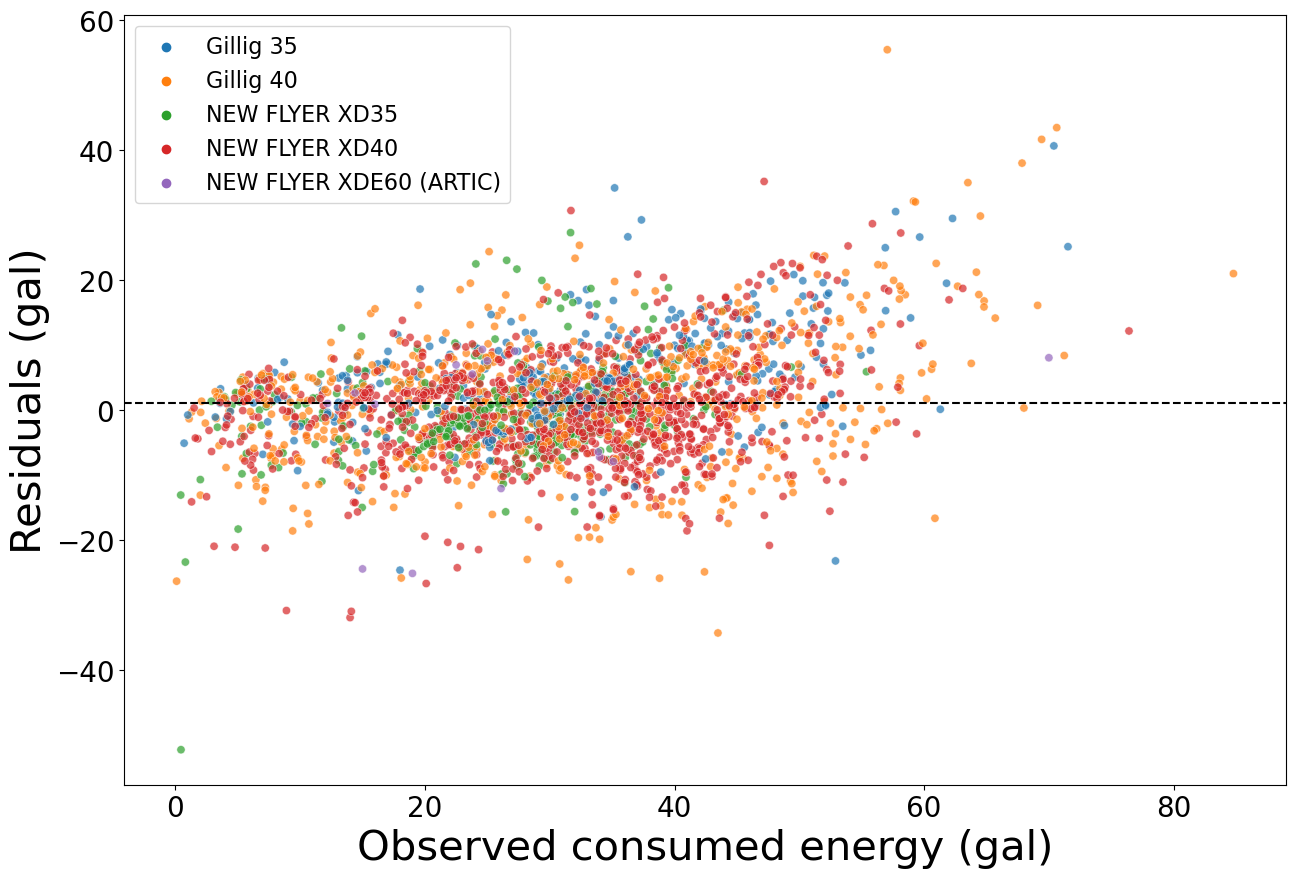

In [572]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='gallons', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='black', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Observed consumed energy (gal)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
fig.savefig(r'../../figures/residuals-vs-consumed-energy-conventional.png', dpi=400, bbox_inches='tight')

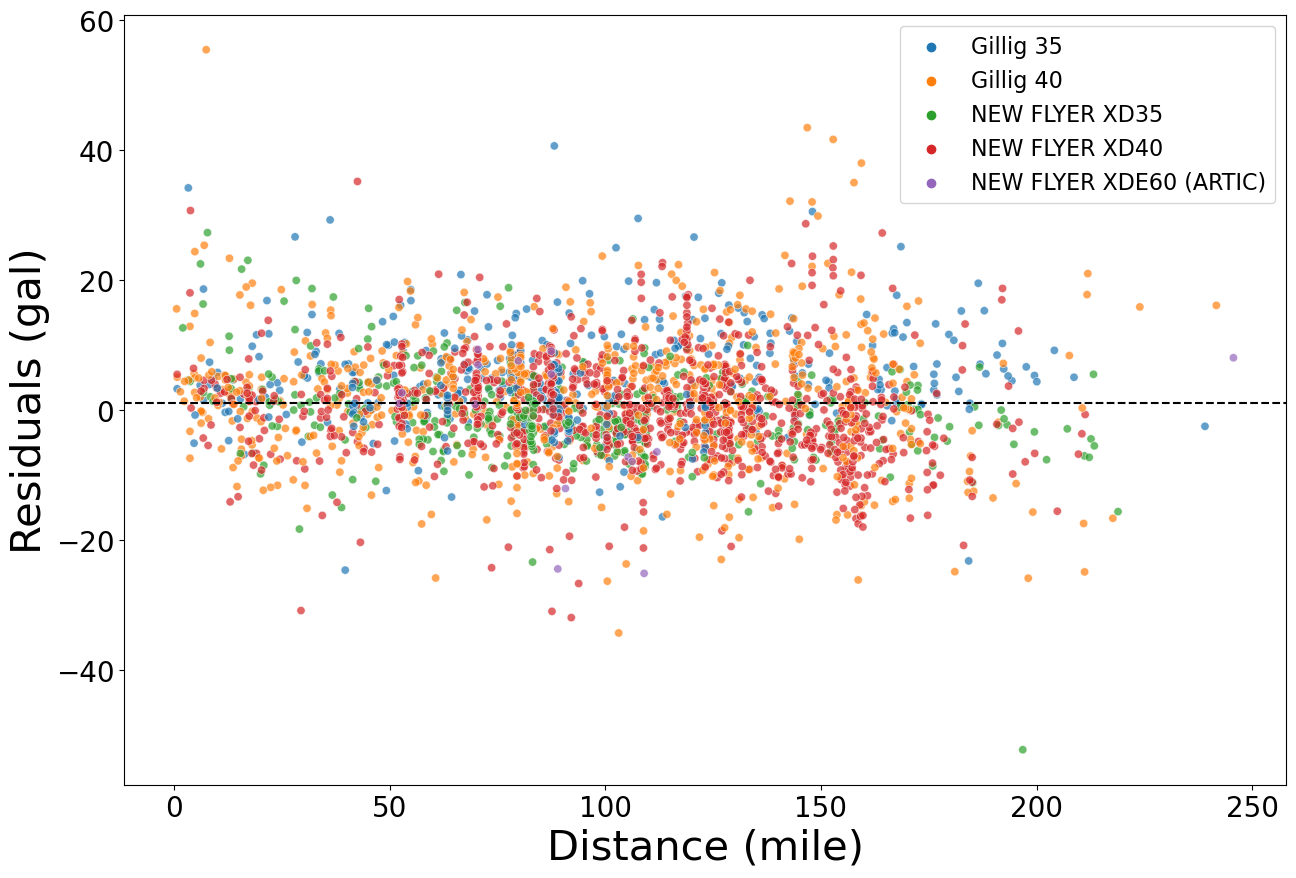

In [558]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='dist', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='black', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Distance (mile)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/residuals-vs-dist-conventional.png', dpi=400, bbox_inches='tight')

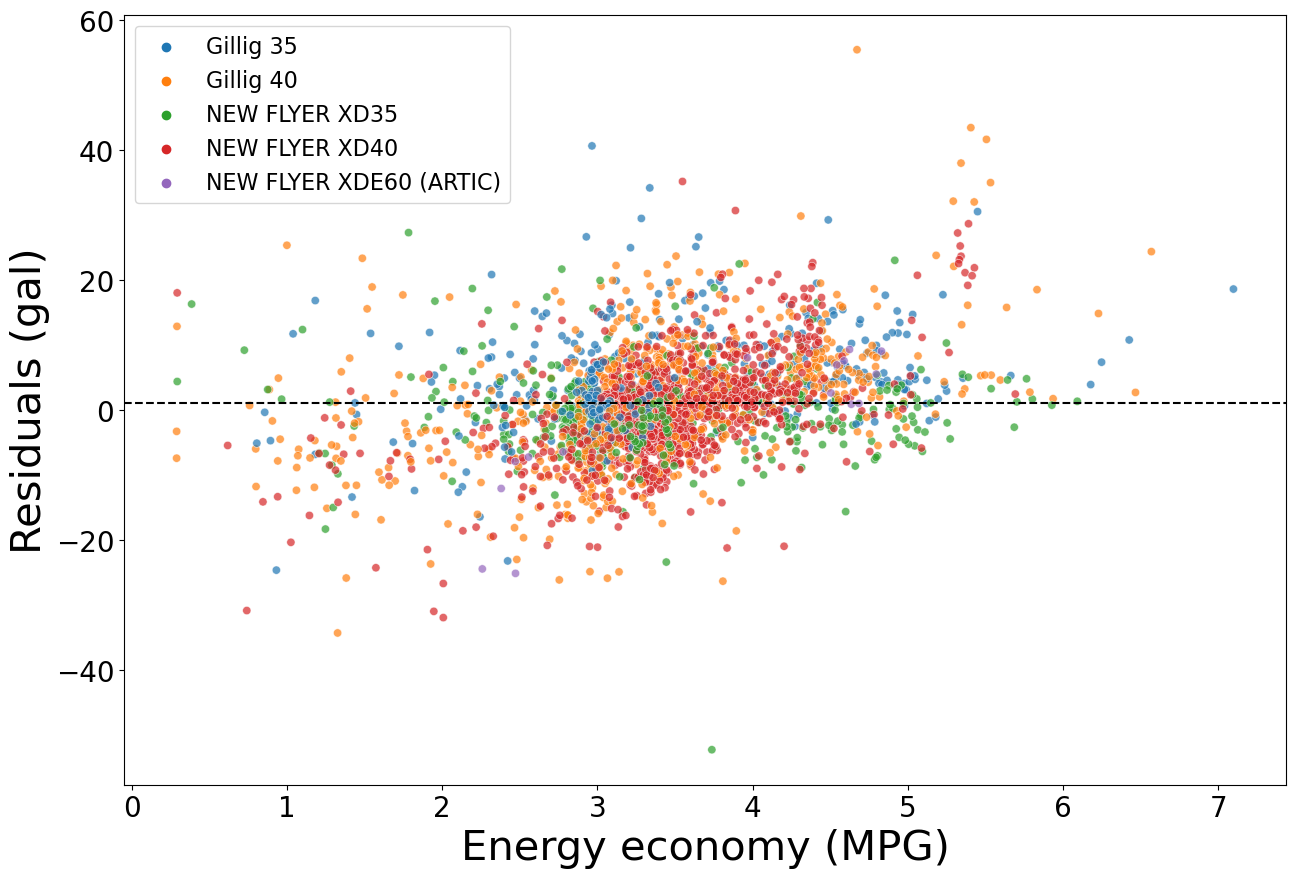

In [559]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='economy', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='black', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Energy economy (MPG)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/residuals-vs-economy-conventional.png', dpi=400, bbox_inches='tight')

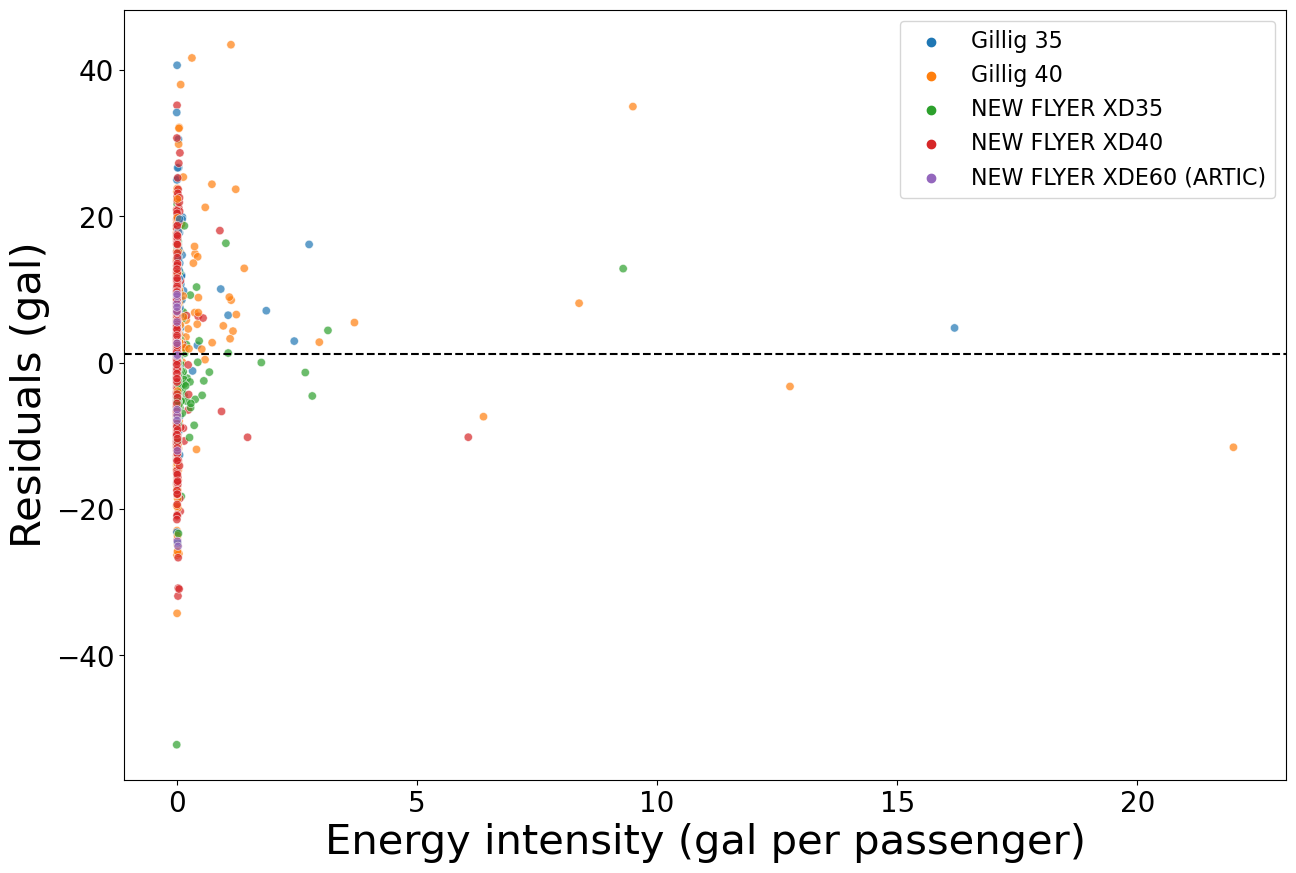

In [560]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='intensity', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='black', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Energy intensity (gal per passenger)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
fig.savefig(r'../../figures/residuals-vs-energy-intensity-conventional.png', dpi=400, bbox_inches='tight')

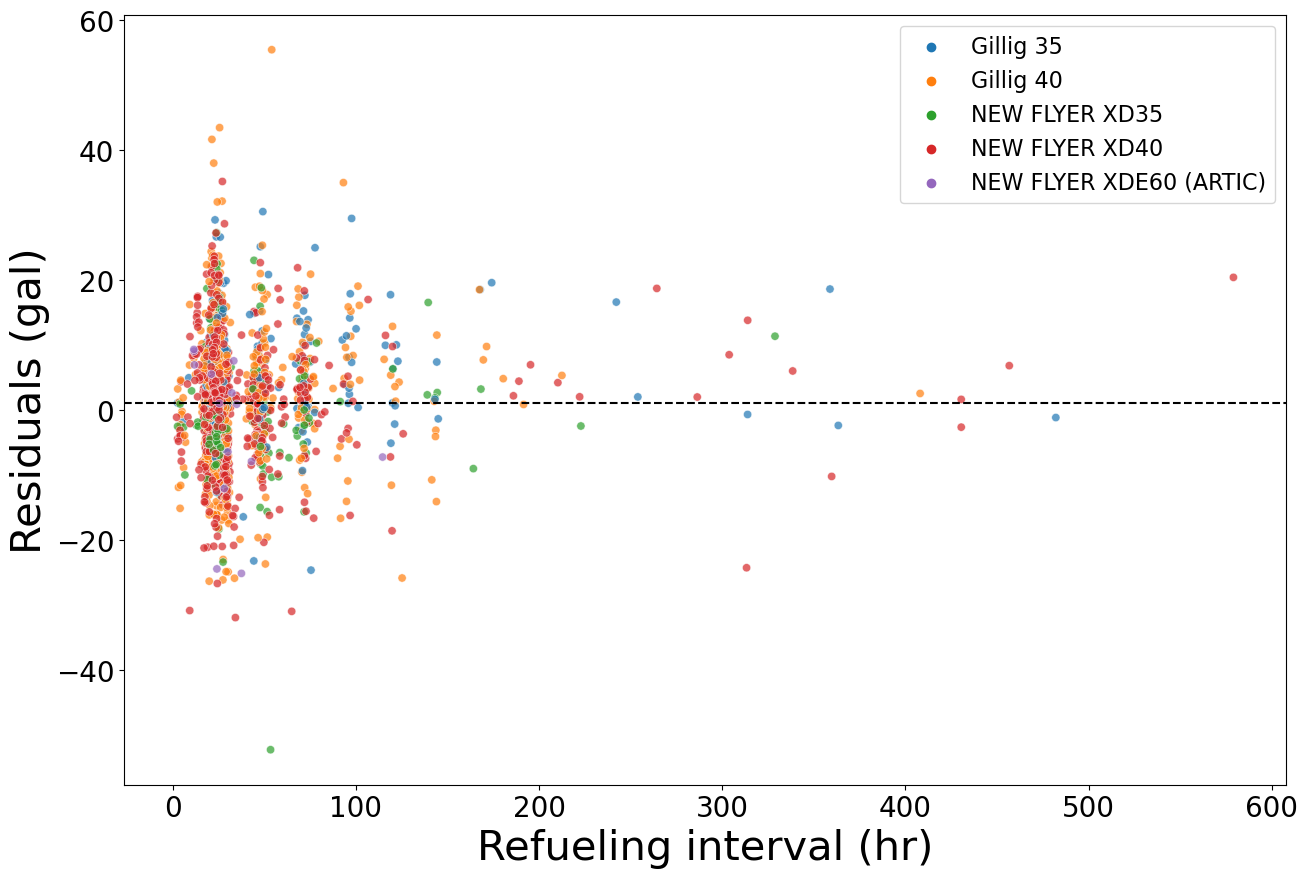

In [561]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='time_delta_in_hours', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='black', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Refueling interval (hr)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
fig.savefig(r'../../figures/residuals-vs-interval-conventional.png', dpi=400, bbox_inches='tight')

In [473]:
df_conventional['residual'].mean()

1.1424230483085054

<AxesSubplot: >

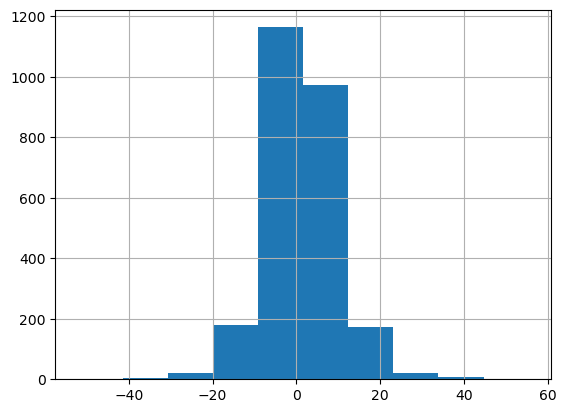

In [474]:
df_conventional['residual'].hist()

In [475]:
df_hybrid['residual']=df_hybrid['gallons']-df_hybrid['Energy']

In [476]:
df_hybrid['economy']=df_hybrid['dist']/df_hybrid['Energy']

In [477]:
df_hybrid['intensity']=df_hybrid['Energy']/df_hybrid['Onboard']

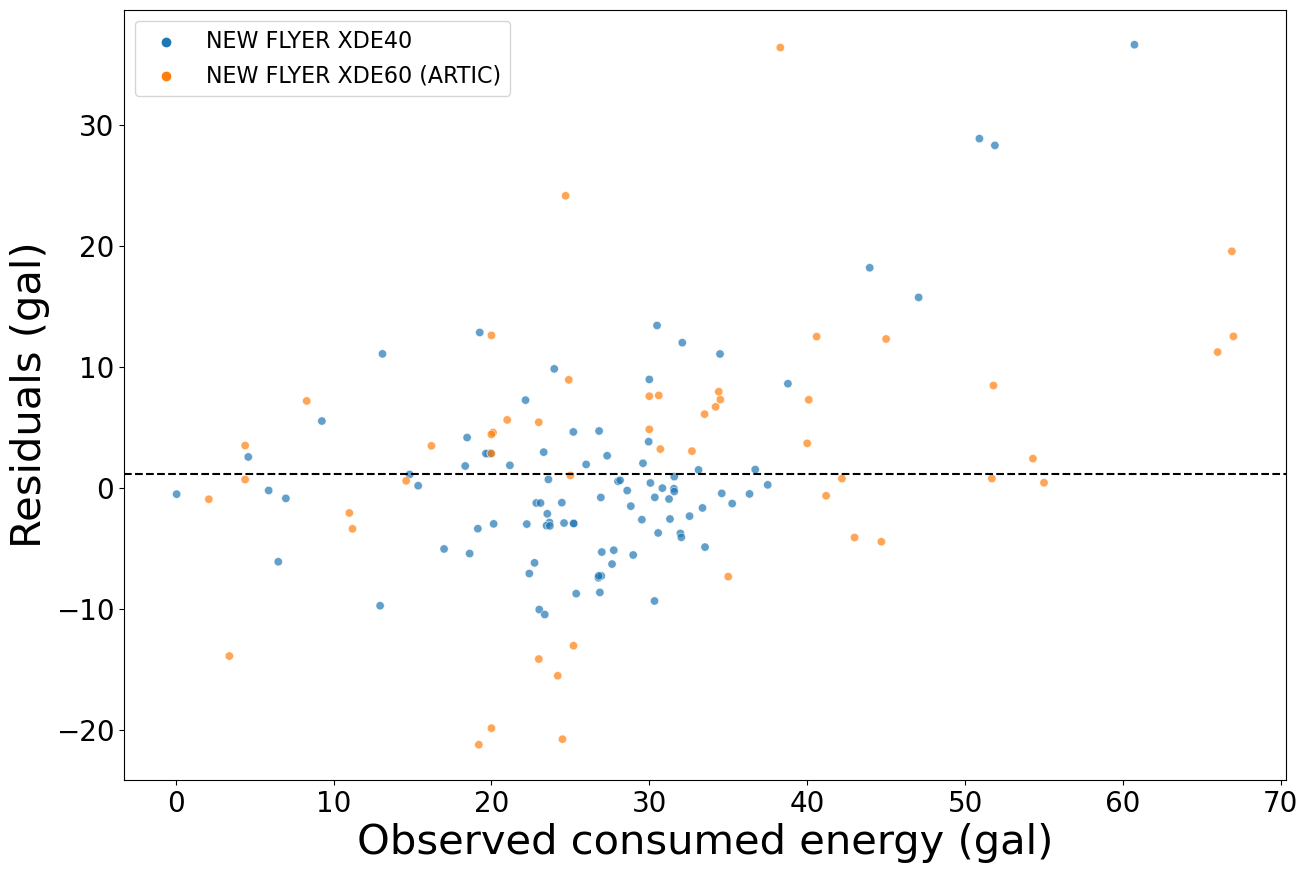

In [562]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='gallons', y='residual', data=df_hybrid, hue='VehicleModel', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='black', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Observed consumed energy (gal)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
fig.savefig(r'../../figures/residuals-vs-consumed-energy-hybrid.png', dpi=400, bbox_inches='tight')

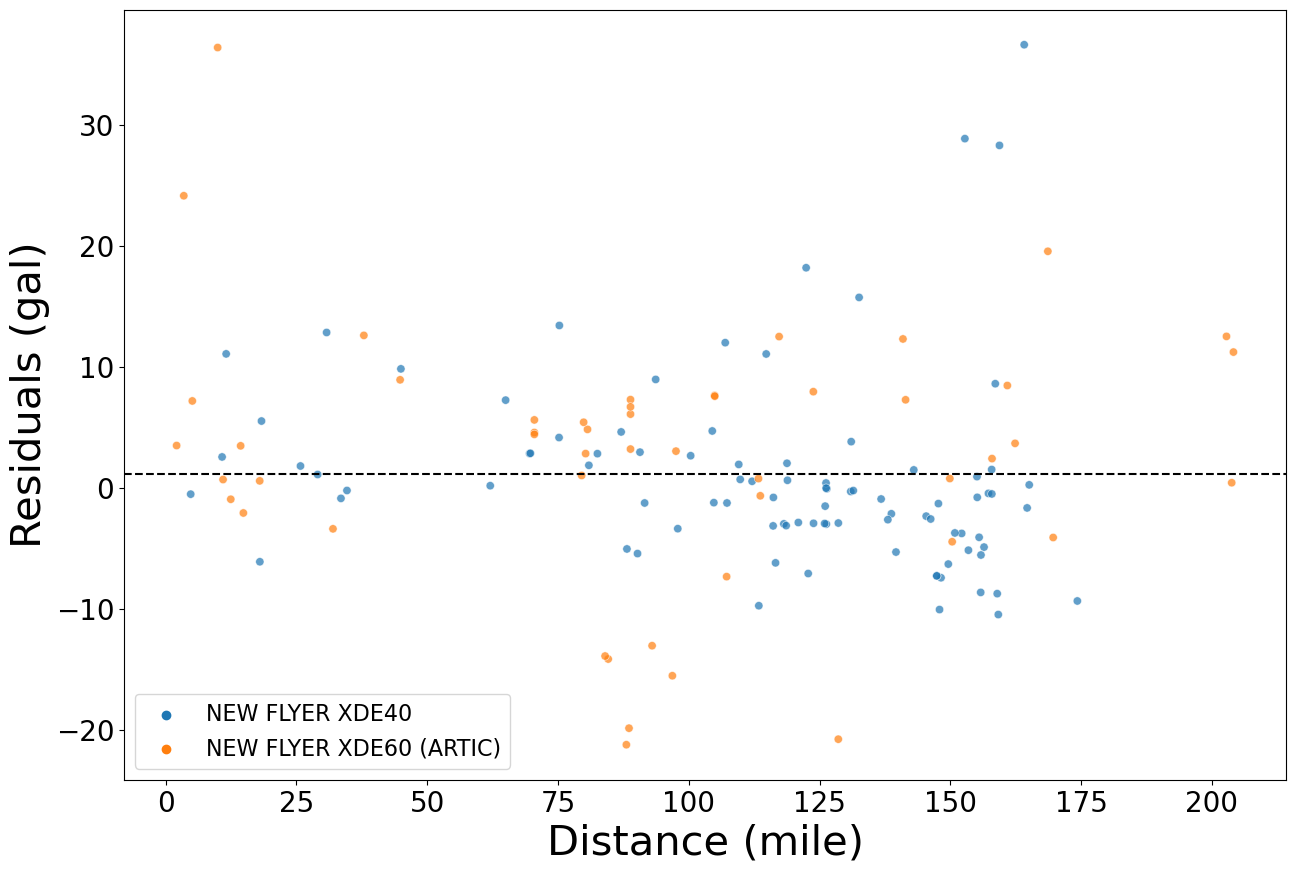

In [563]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='dist', y='residual', data=df_hybrid, hue='VehicleModel', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='black', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Distance (mile)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/residuals-vs-dist-hybrid.png', dpi=400, bbox_inches='tight')

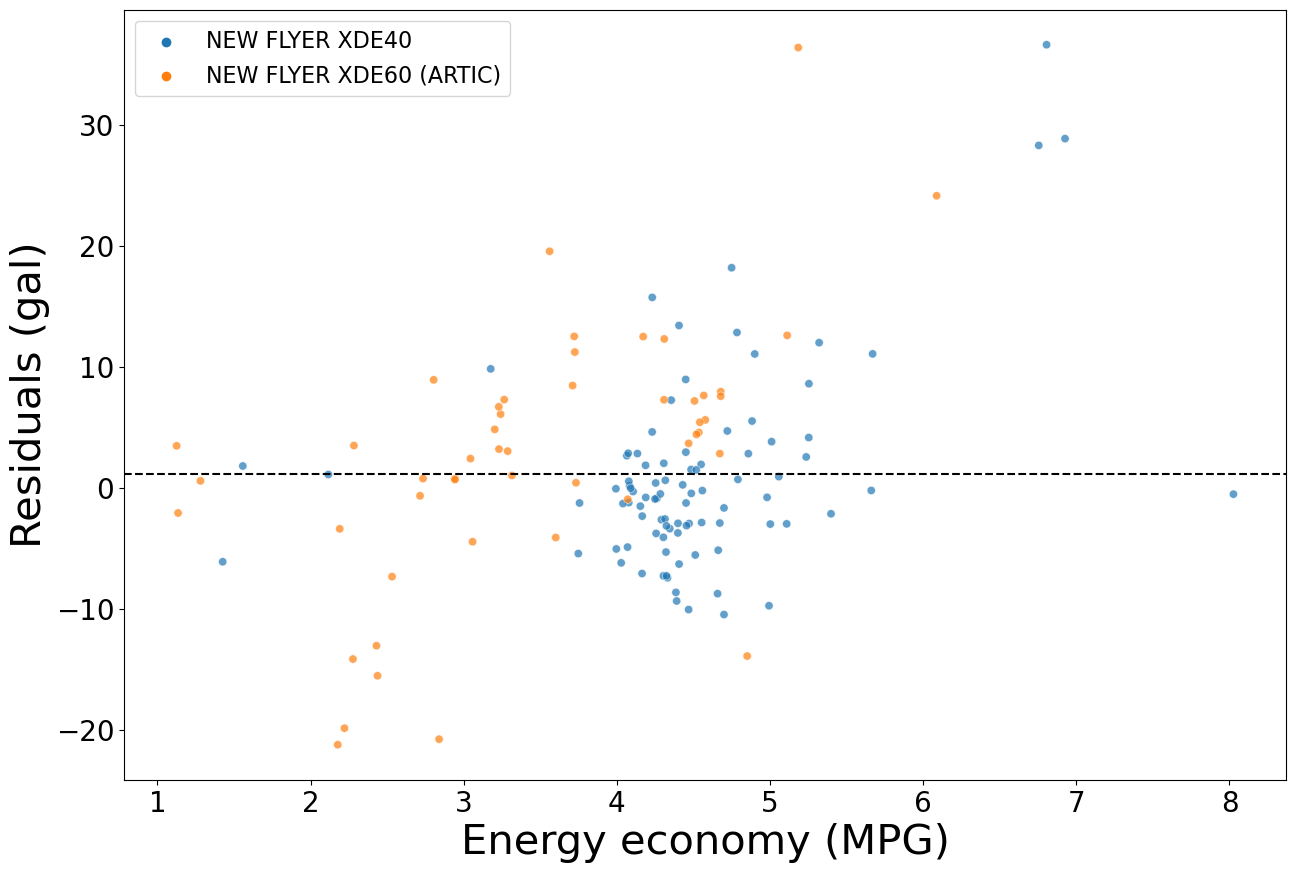

In [564]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='economy', y='residual', data=df_hybrid, hue='VehicleModel', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='black', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Energy economy (MPG)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/residuals-vs-economy-hybrid.png', dpi=400, bbox_inches='tight')

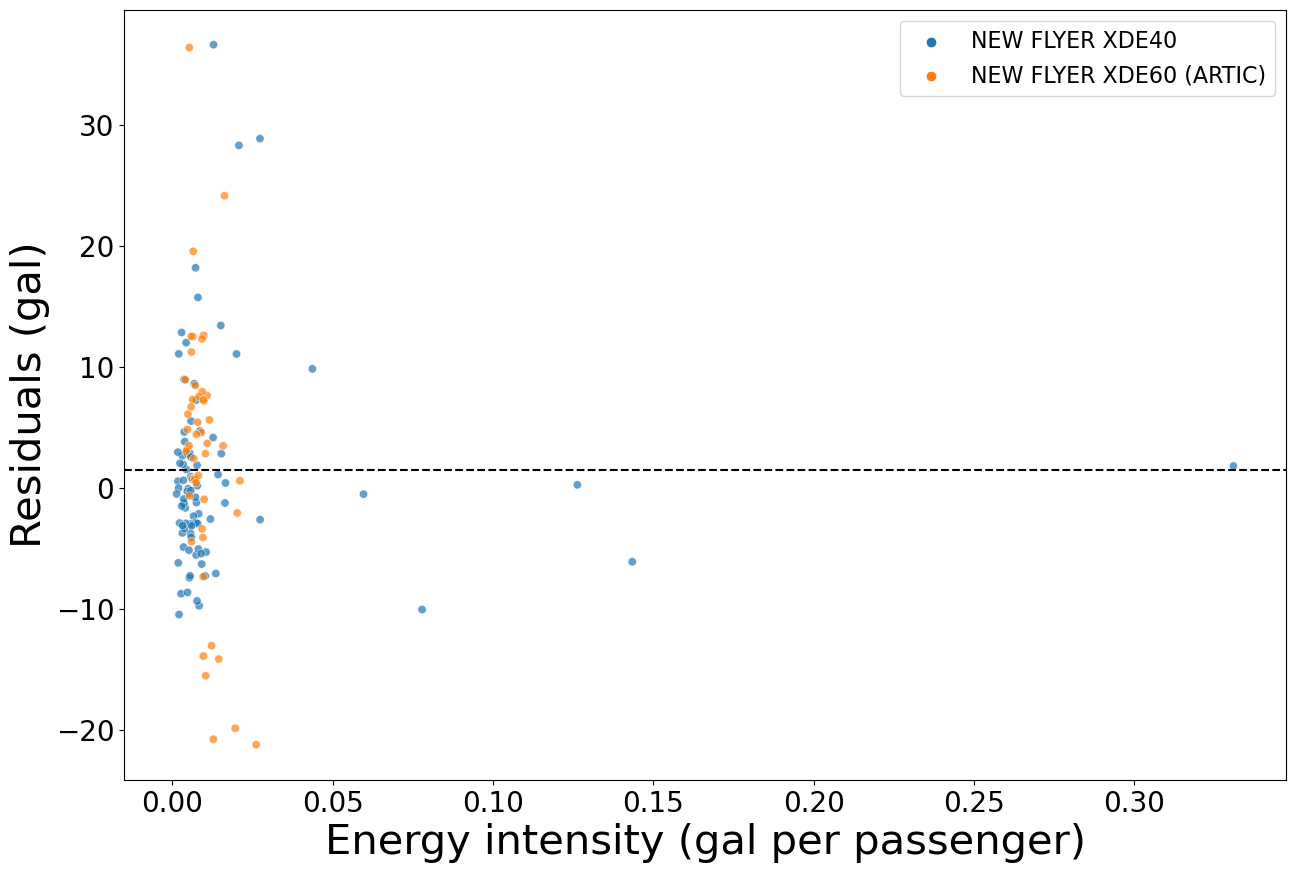

In [565]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='intensity', y='residual', data=df_hybrid, hue='VehicleModel', alpha=0.7)
plt.axhline(df_hybrid['residual'].mean(),color='black', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Energy intensity (gal per passenger)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
fig.savefig(r'../../figures/residuals-vs-energy-intensity-hybrid.png', dpi=400, bbox_inches='tight')

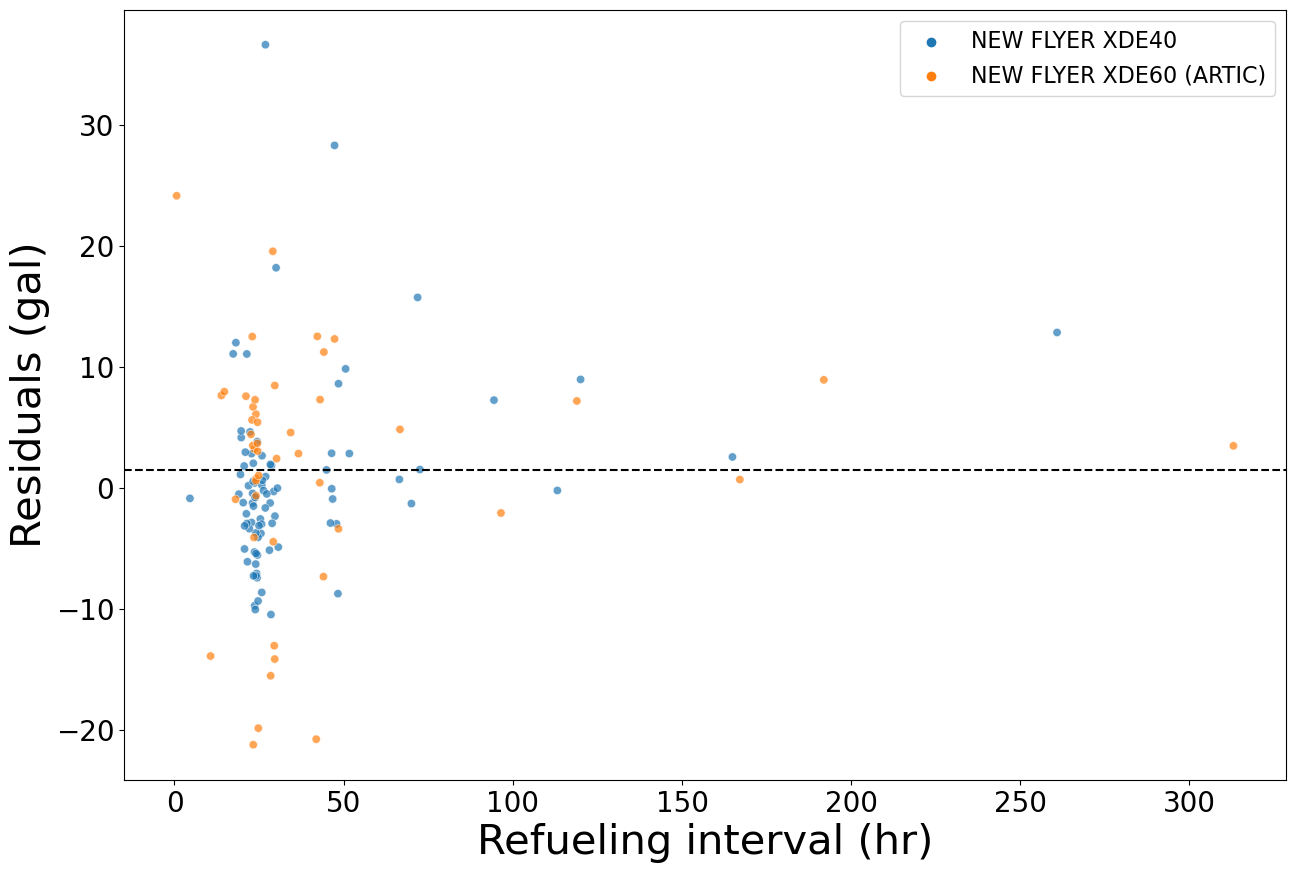

In [566]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='time_delta_in_hours', y='residual', data=df_hybrid, hue='VehicleModel', alpha=0.7)
plt.axhline(df_hybrid['residual'].mean(),color='black', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Refueling interval (hr)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
fig.savefig(r'../../figures/residuals-vs-interval-hybrid.png', dpi=400, bbox_inches='tight')

In [483]:
df_hybrid['residual'].mean()

1.4314048416001404

<AxesSubplot: >

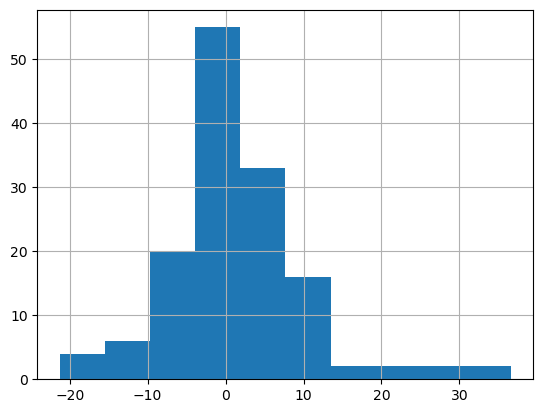

In [484]:
df_hybrid['residual'].hist()

In [485]:
df_model.columns

Index(['ServiceDateTime', 'DateKey', 'CalendarDate', 'Year', 'Month', 'OpKey',
       'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName', 'TripKey', 'Trip',
       'StopKey', 'Stop', 'StopName', 'Lat', 'Lon', 'Vehicle', 'VehicleType',
       'SeatedCap', 'TotalCap', 'Boards', 'Alights', 'Onboard', 'Bike',
       'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second', 'Date', 'Daytype',
       'time', 'time_delta', 'time_delta_in_seconds', 'dist', 'Speed',
       'Acceleration', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'elevation', 'grade', 'Energy'],
      dtype='object')

In [486]:
df_conventional.nlargest(20,['residual'])

,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,Onboard,time,level_0,index,time_delta,time_delta_in_hours,residual,economy,intensity
302,2022-04-06 21:51:00,1619,57.05,2022-04-06,conventional,7.451466,1.594517,Gillig 40,0.0,NaN,346.0,678.0,2 days 06:06:00,54.100000,55.455483,4.673179,inf
585,2022-04-14 19:29:00,1661,70.63,2022-04-14,conventional,146.833040,27.157602,Gillig 40,24.0,NaN,629.0,1444.0,1 days 01:39:00,25.650000,43.472398,5.406701,1.131567
593,2022-04-27 19:31:00,1661,69.42,2022-04-27,conventional,152.845814,27.754067,Gillig 40,87.0,NaN,637.0,2688.0,0 days 21:27:00,21.450000,41.665933,5.507150,0.319012
2237,2022-04-02 00:29:00,3310,70.40,2022-04-02,conventional,88.179157,29.734058,Gillig 35,2835.0,NaN,2281.0,240.0,NaT,NaN,40.665942,2.965594,0.010488
546,2022-04-16 21:59:00,1657,67.85,2022-04-16,conventional,159.392757,29.830104,Gillig 40,351.0,NaN,590.0,1686.0,0 days 22:27:00,22.450000,38.019896,5.343352,0.084986
1612,2022-04-13 23:42:00,1841,47.18,2022-04-13,conventional,42.533680,11.985160,NEW FLYER XD40,1295.0,NaN,1656.0,1378.0,1 days 03:10:00,27.166667,35.194840,3.548862,0.009255
436,2022-04-19 19:32:00,1652,63.51,2022-04-19,conventional,157.669557,28.492948,Gillig 40,3.0,NaN,480.0,1887.0,3 days 21:14:00,93.233333,35.017052,5.533634,9.497649
2280,2022-04-01 00:28:00,3312,35.20,2022-04-01,conventional,3.311691,0.992105,Gillig 35,335.0,NaN,2324.0,120.0,NaT,NaN,34.207895,3.338046,0.002962
343,2022-04-12 19:35:00,1643,59.15,2022-04-12,conventional,142.827627,26.982346,Gillig 40,503.0,NaN,387.0,1220.0,1 days 03:01:00,27.016667,32.167654,5.293373,0.053643
472,2022-04-05 19:33:00,1654,59.30,2022-04-05,conventional,147.949615,27.255349,Gillig 40,552.0,NaN,516.0,541.0,1 days 00:24:00,24.400000,32.044651,5.428278,0.049376


In [487]:
df_conventional.nsmallest(20,['residual'])

,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,Onboard,time,level_0,index,time_delta,time_delta_in_hours,residual,economy,intensity
915,2022-04-07 23:15:00,1722,0.45,2022-04-07,conventional,196.805230,52.650400,NEW FLYER XD35,21572.0,NaN,959.0,808.0,2 days 05:28:00,53.466667,-52.200400,3.737963,0.002441
598,2022-04-07 16:04:00,1662,43.48,2022-04-07,conventional,103.110207,77.722255,Gillig 40,7322.0,NaN,642.0,733.0,NaT,NaN,-34.242255,1.326650,0.010615
2815,2022-04-06 05:30:00,7802,14.00,2022-04-06,conventional,92.111201,45.880316,NEW FLYER XD40,1597.0,NaN,2864.0,604.0,1 days 10:16:00,34.266667,-31.880316,2.007641,0.028729
2923,2022-04-26 05:52:00,7814,14.10,2022-04-26,conventional,87.635194,45.019644,NEW FLYER XD40,855.0,NaN,2972.0,2519.0,2 days 17:00:00,65.000000,-30.919644,1.946599,0.052655
2550,2022-04-17 05:57:00,3325,8.90,2022-04-17,conventional,29.433979,39.695805,NEW FLYER XD40,1157.0,NaN,2594.0,1696.0,0 days 09:20:00,9.333333,-30.795805,0.741488,0.034309
2816,2022-04-07 05:55:00,7802,20.10,2022-04-07,conventional,93.830969,46.737201,NEW FLYER XD40,1430.0,NaN,2865.0,718.0,1 days 00:25:00,24.416667,-26.637201,2.007629,0.032683
2190,2022-04-06 22:54:00,3305,0.10,2022-04-06,conventional,100.477234,26.378558,Gillig 40,2935.0,NaN,2234.0,691.0,0 days 19:58:00,19.966667,-26.278558,3.809049,0.008988
2206,2022-04-20 05:10:00,3305,31.50,2022-04-20,conventional,158.644087,57.582904,Gillig 40,1202.0,NaN,2250.0,1950.0,1 days 03:27:00,27.450000,-26.082904,2.755055,0.047906
2136,2022-04-06 10:46:00,3302,38.80,2022-04-06,conventional,198.074560,64.621039,Gillig 40,2300.0,NaN,2180.0,606.0,1 days 09:46:00,33.766667,-25.821039,3.065171,0.028096
2349,2022-04-21 04:41:00,3316,18.10,2022-04-21,conventional,60.664383,43.890898,Gillig 40,2393.0,NaN,2393.0,2066.0,5 days 05:16:00,125.266667,-25.790898,1.382163,0.018341


In [488]:
df_validation.loc[(df_validation['Vehicle']==7661)&(df_validation['date']=='2022-04-20')]

,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,Onboard
2808,2019,2022-04-20 20:59:00,7661,49.4,2022-04-20,conventional,NaN,NaN,NaN,NaN
2809,2020,2022-04-20 20:59:00,7661,59.4,2022-04-20,conventional,NaN,NaN,NaN,NaN


In [489]:
df_conventional

,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,Onboard,time,level_0,index,time_delta,time_delta_in_hours,residual,economy,intensity
1,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,53.128981,18.357928,Gillig 35,1403.0,NaN,45.0,136.0,NaT,NaN,9.072072,2.894062,0.013085
2,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,52.538729,16.982936,Gillig 35,523.0,NaN,46.0,266.0,1 days 02:56:00,26.933333,16.167064,3.093619,0.032472
3,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,182.556936,37.014156,Gillig 35,3192.0,NaN,47.0,512.0,2 days 23:27:00,71.450000,15.275844,4.932084,0.011596
4,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,38.274092,24.864292,Gillig 35,541.0,NaN,48.0,657.0,1 days 01:52:00,25.866667,11.825708,1.539320,0.045960
5,2022-04-07 18:41:00,1552,45.61,2022-04-07,conventional,166.541198,33.728877,Gillig 35,1060.0,NaN,49.0,749.0,0 days 22:52:00,22.866667,11.881123,4.937644,0.031820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,70.479247,15.238986,NEW FLYER XDE60 (ARTIC),1798.0,NaN,3064.0,2437.0,0 days 11:35:00,11.583333,9.361014,4.624930,0.008476
3016,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,52.211481,11.142725,NEW FLYER XDE60 (ARTIC),647.0,NaN,3065.0,2576.0,1 days 01:31:00,25.516667,1.057275,4.685701,0.017222
3017,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,87.466541,18.232634,NEW FLYER XDE60 (ARTIC),2001.0,NaN,3066.0,2656.0,0 days 21:09:00,21.150000,5.567366,4.797252,0.009112
3018,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,109.002254,44.079260,NEW FLYER XDE60 (ARTIC),1456.0,NaN,3067.0,2878.0,1 days 13:33:00,37.550000,-25.079260,2.472869,0.030274


In [490]:
df_conventional_plot = df_conventional.groupby('date').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()

In [491]:
df_conventional_plot

,date,gallons,Energy
0,2022-04-01,2318.19,2127.688594
1,2022-04-02,2034.05,2027.254655
2,2022-04-03,908.60,944.327377
3,2022-04-04,3056.31,2950.167448
4,2022-04-05,3248.56,3146.467471
5,2022-04-06,3083.71,3034.848407
6,2022-04-07,3085.42,2994.968432
7,2022-04-08,2938.26,2924.043363
8,2022-04-09,1995.33,1991.415678
9,2022-04-10,882.93,859.687799


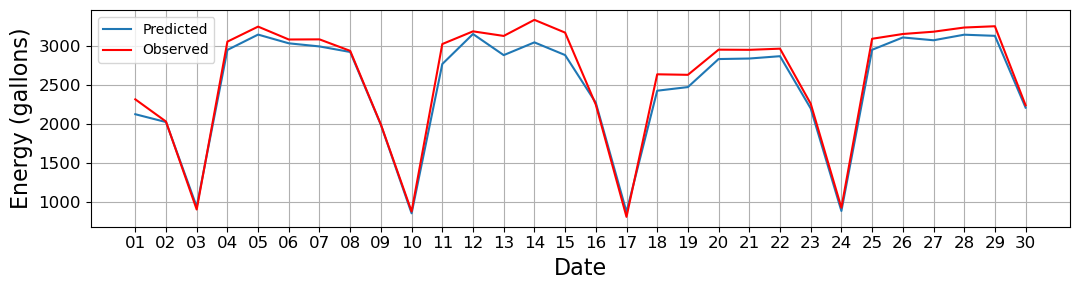

In [492]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_conventional_plot.date, df_conventional_plot.Energy, label='Predicted')
fig=plt.plot(df_conventional_plot.gallons, label='Observed', color='red')
#fig=plt.plot(df_daily_energy_validation_CDB.date, df_daily_energy_validation_CDB.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Date', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.grid()

plt.savefig(r'../../figures/timeseries-energy-CDB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

In [493]:
df_hybrid_plot = df_hybrid.groupby('date').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()

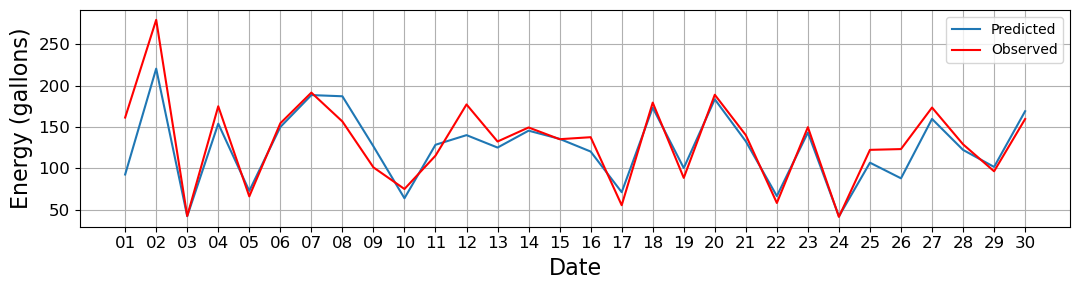

In [494]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_hybrid_plot.date, df_hybrid_plot.Energy, label='Predicted')
fig=plt.plot(df_hybrid_plot.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Date', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


plt.grid()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'../../figures/timeseries-energy-HEB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

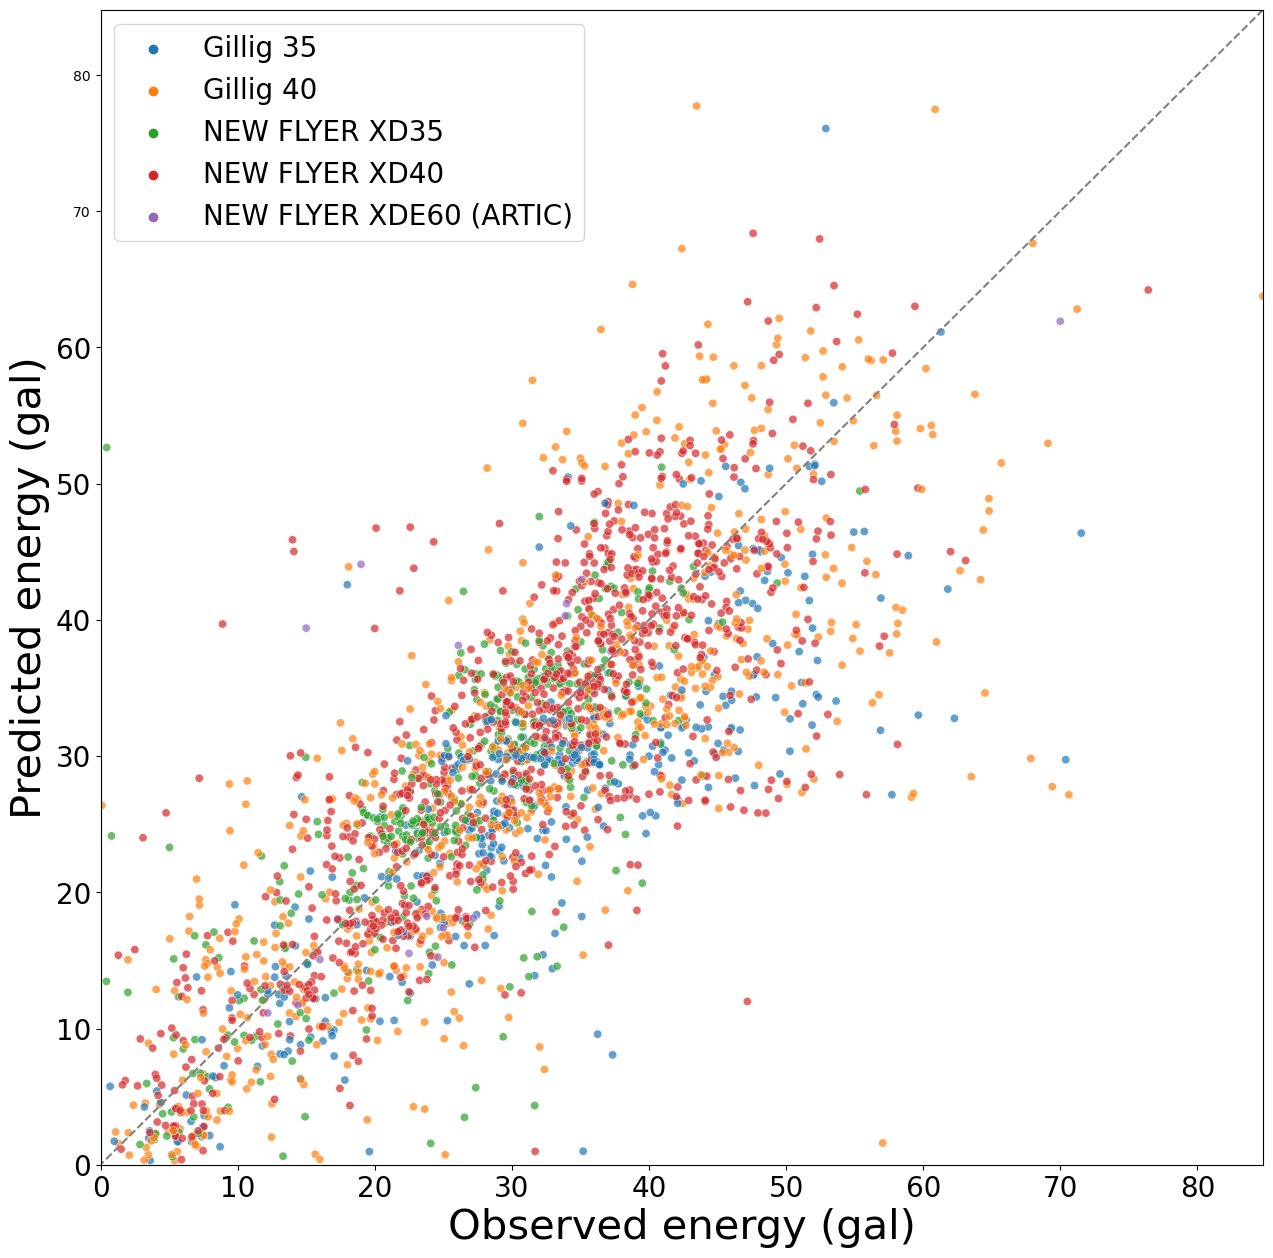

In [615]:
fig, ax = plt.subplots(figsize=(15,15))
#plt.scatter(df_conventional['Real_Energy'], df_conventional['Energy'], c='crimson')
sns.scatterplot(x='gallons', y='Energy', data=df_conventional, hue='VehicleModel', alpha=0.7)

p1 = max(max(df_conventional['gallons']), max(df_conventional['Energy']))
p2 = min(min(df_conventional['gallons']), min(df_conventional['Energy']))
plt.plot([p1, p2], [p1, p2], linestyle="dashed", color='gray')
plt.xlabel('Observed energy (gal)', fontsize=30)
plt.ylabel('Predicted energy (gal)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlim([0, max(max(df_conventional['gallons']), max(df_conventional['Energy']))])
plt.ylim([0, max(max(df_conventional['gallons']), max(df_conventional['Energy']))])
fig.savefig(r'../../figures/actual-predicted-CDB-energy.png', dpi=400, bbox_inches='tight')
plt.show()

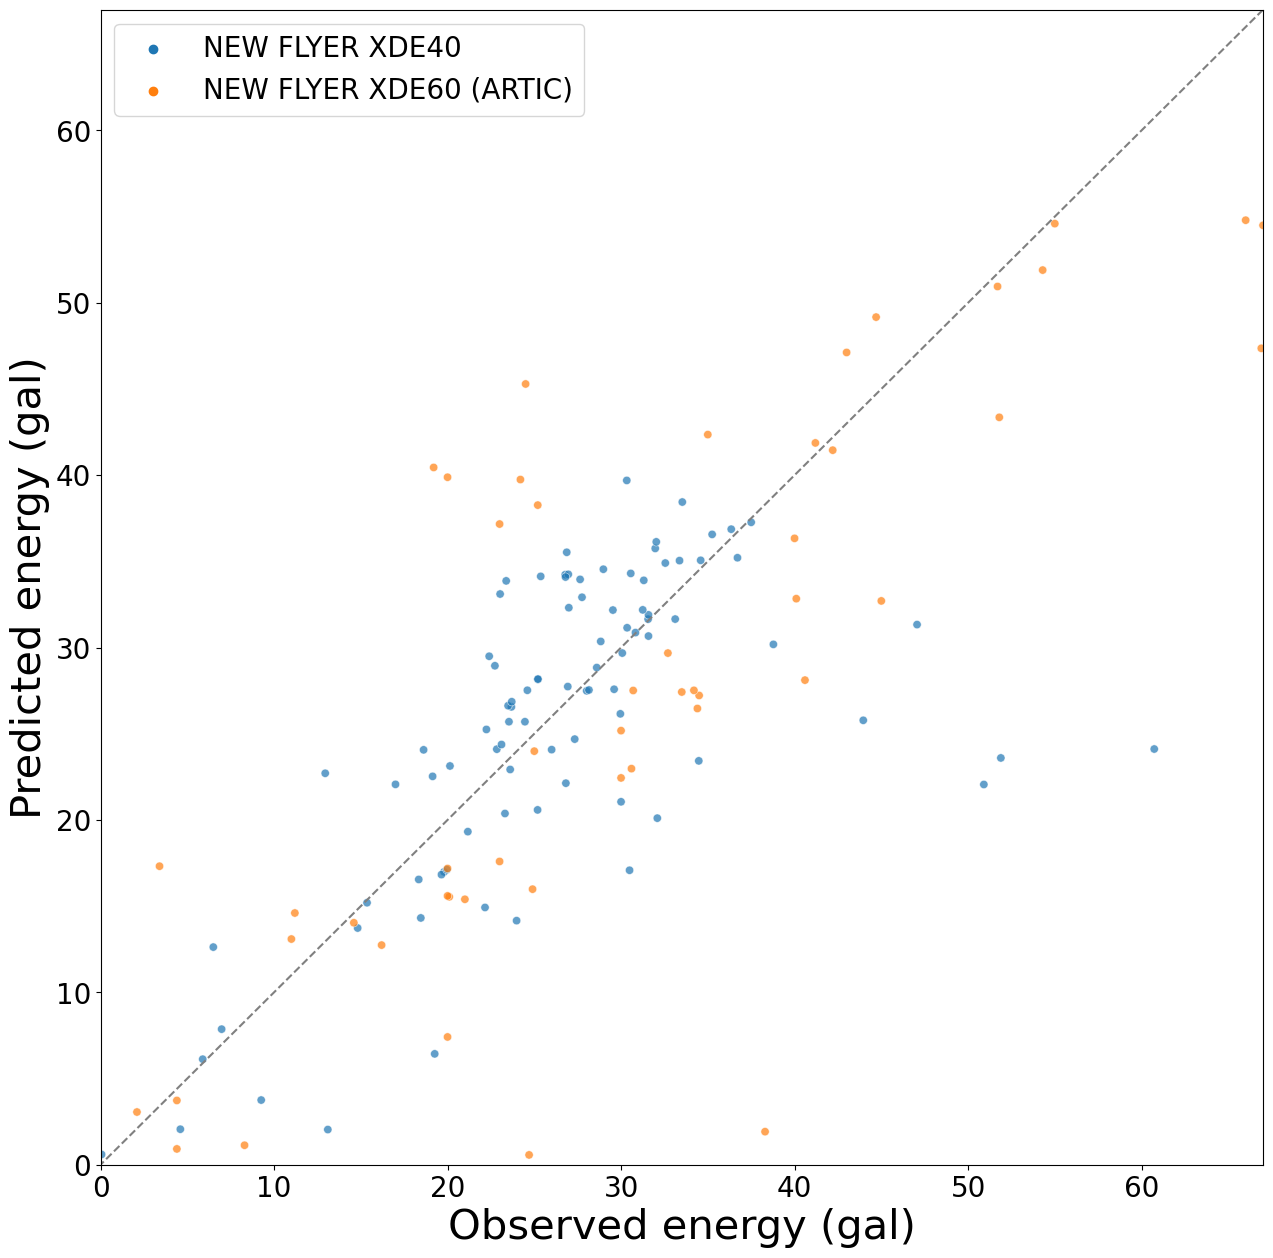

In [616]:
fig, ax = plt.subplots(figsize=(15,15))
#plt.scatter(df_hybrid['Real_Energy'], df_hybrid['Energy'], c='crimson')
sns.scatterplot(x='gallons', y='Energy', data=df_hybrid, hue='VehicleModel', alpha=0.7)


p1 = max(max(df_hybrid['gallons']), max(df_hybrid['Energy']))
p2 = min(min(df_hybrid['gallons']), min(df_hybrid['Energy']))
plt.plot([p1, p2], [p1, p2], linestyle="dashed", color='gray')
plt.xlabel('Observed energy (gal)', fontsize=30)
plt.ylabel('Predicted energy (gal)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlim([0, max(max(df_hybrid['gallons']), max(df_hybrid['Energy']))])
plt.ylim([0, max(max(df_hybrid['gallons']), max(df_hybrid['Energy']))])
fig.savefig(r'../../figures/actual-predicted-HEB-energy.png', dpi=400, bbox_inches='tight')
plt.show()

In [497]:
train_dates=['2022-04-01','2022-04-02','2022-04-03','2022-04-04','2022-04-05','2022-04-06','2022-04-07','2022-04-08','2022-04-09','2022-04-10','2022-04-11','2022-04-12','2022-04-13', '2022-04-14','2022-04-15','2022-04-16','2022-04-17','2022-04-18','2022-04-19','2022-04-20','2022-04-21','2022-04-22','2022-04-23']
train_df_conventional_plot = df_conventional_plot[df_conventional_plot.date.isin(train_dates)]
test_dates=['2022-04-24','2022-04-25','2022-04-26','2022-04-27','2022-04-28','2022-04-29','2022-04-30']
test_df_conventional_plot = df_conventional_plot[df_conventional_plot.date.isin(test_dates)]

In [498]:
train_dates=['2022-04-01','2022-04-02','2022-04-03','2022-04-04','2022-04-05','2022-04-06','2022-04-07','2022-04-08','2022-04-09','2022-04-10','2022-04-11','2022-04-12','2022-04-13', '2022-04-14','2022-04-15','2022-04-16','2022-04-17','2022-04-18','2022-04-19','2022-04-20','2022-04-21','2022-04-22','2022-04-23']
train_df_hybrid_plot = df_hybrid_plot[df_hybrid_plot.date.isin(train_dates)]
test_dates=['2022-04-24','2022-04-25','2022-04-26','2022-04-27','2022-04-28','2022-04-29','2022-04-30']
test_df_hybrid_plot = df_hybrid_plot[df_hybrid_plot.date.isin(test_dates)]

In [499]:
### Compute system level errors
rmse_conventional_train_system= mean_squared_error(train_df_conventional_plot['gallons'], train_df_conventional_plot['Energy'], squared=False)
rmse_conventional_test_system= mean_squared_error(test_df_conventional_plot['gallons'], test_df_conventional_plot['Energy'], squared=False)
rmse_hybrid_train_system = mean_squared_error(train_df_hybrid_plot['gallons'], train_df_hybrid_plot['Energy'], squared=False)
rmse_hybrid_test_system = mean_squared_error(test_df_hybrid_plot['gallons'], test_df_hybrid_plot['Energy'], squared=False)
MAPE_conventional_train_system = np.mean(np.abs((df_conventional_train['gallons'] - df_conventional_train['Energy']) / df_conventional_train['gallons'])) * 100
MAPE_conventional_test_system = np.mean(np.abs((df_conventional_test['gallons'] - df_conventional_test['Energy']) / df_conventional_test['gallons'])) * 100
MAPE_hybrid_train_system = np.mean(np.abs((df_hybrid_train['gallons'] - df_hybrid_train['Energy']) / df_hybrid_train['gallons'])) * 100
MAPE_hybrid_test_system = np.mean(np.abs((df_hybrid_test['gallons'] - df_hybrid_test['Energy']) / df_hybrid_test['gallons'])) * 100

In [500]:
print('rmse_conventional_train_system:',rmse_conventional_train_system)
print('rmse_conventional_test_system:',rmse_conventional_test_system)
print('rmse_hybrid_train_system:',rmse_hybrid_train_system)
print('rmse_hybrid_test_system:',rmse_hybrid_test_system)
print('MAPE_conventional_train_system:',rmse_hybrid_test_system)
print('MAPE_conventional_test_system:',rmse_hybrid_test_system)
print('MAPE_hybrid_train_system:',rmse_hybrid_test_system)
print('MAPE_hybrid_test_system:',rmse_hybrid_test_system)

rmse_conventional_train_system: 143.8759170961222
rmse_conventional_test_system: 92.57280344453201
rmse_hybrid_train_system: 23.801249288436438
rmse_hybrid_test_system: 16.25180620587814
MAPE_conventional_train_system: 16.25180620587814
MAPE_conventional_test_system: 16.25180620587814
MAPE_hybrid_train_system: 16.25180620587814
MAPE_hybrid_test_system: 16.25180620587814


In [591]:
# Hourly energy consumption box plot
df_integrated_diesel['Hour']=df_integrated_diesel.ServiceDateTime.dt.hour
df_integrated_diesel['fuel_economy']=df_integrated_diesel['dist']/df_integrated_diesel['Energy']

In [592]:
df_integrated_diesel_hourly_plot = df_integrated_diesel.groupby(['date','Hour']).agg({'Energy': ['sum'],'fuel_economy': ['mean'],'Onboard':['mean'], 'VehicleModel':['max']}).reset_index()

In [593]:
df_integrated_diesel_hourly_plot.columns = df_integrated_diesel_hourly_plot.columns.droplevel(1)
df_integrated_diesel_hourly_plot

,date,Hour,Energy,fuel_economy,Onboard,VehicleModel
0,2022-04-01,0,4.282667,3.482298,212.250000,NEW FLYER XDE60 (ARTIC)
1,2022-04-01,5,7.411267,5.112023,760.000000,NEW FLYER XDE60 (ARTIC)
2,2022-04-01,13,13.275390,3.642999,205.000000,Gillig 35
3,2022-04-01,15,67.454884,3.868624,2792.750000,NEW FLYER XD40
4,2022-04-01,16,76.411575,2.281385,1514.400000,NEW FLYER XD40
...,...,...,...,...,...,...
435,2022-04-30,19,165.742053,3.901679,2253.000000,NEW FLYER XD40
436,2022-04-30,20,174.184307,3.589620,3542.333333,NEW FLYER XD40
437,2022-04-30,21,516.286213,3.493059,4373.133333,NEW FLYER XDE40
438,2022-04-30,22,137.529772,3.255891,5275.250000,NEW FLYER XD40


In [594]:
df_integrated_diesel_hourly_plot['energy_intensity']=df_integrated_diesel_hourly_plot['Energy']/df_integrated_diesel_hourly_plot['Onboard']

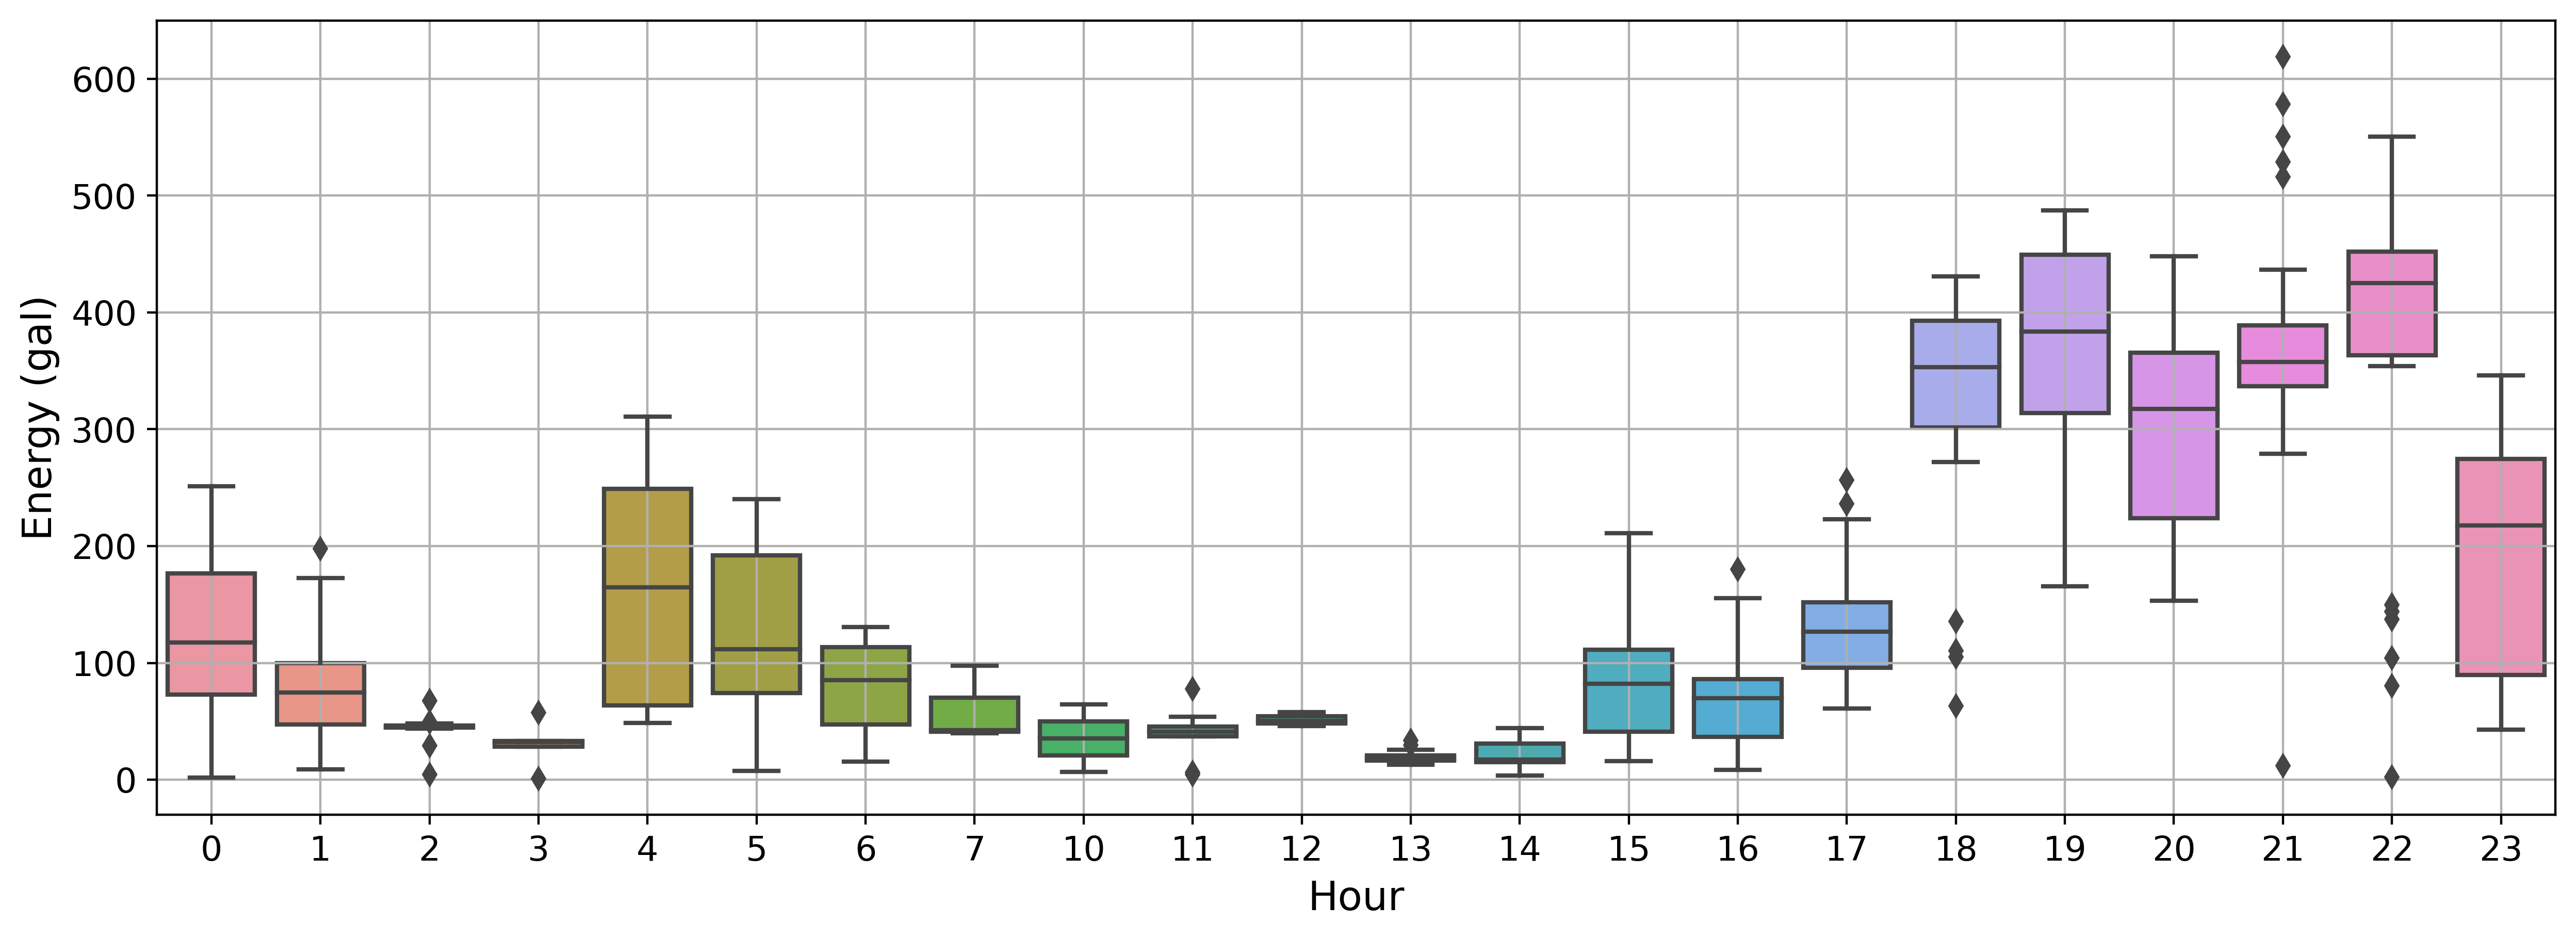

In [610]:
# Plot hourly energy consumption
fig, ax = plt.subplots(figsize=(15,5), dpi=400)
sns.boxplot(x='Hour', y='Energy', data=df_integrated_diesel_hourly_plot)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Energy (gal)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
fig.savefig(r'../../figures/energy-hour.png', dpi=400, bbox_inches='tight')

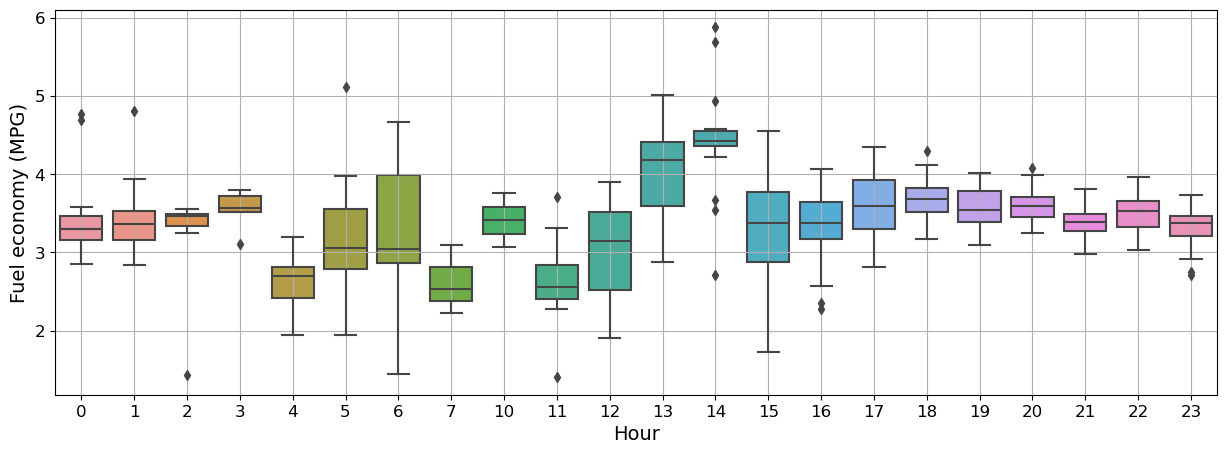

In [609]:
# Plot hourly fuel economy
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x='Hour', y='fuel_economy', data=df_integrated_diesel_hourly_plot)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Fuel economy (MPG)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
fig.savefig(r'../../figures/economy-hour.png', dpi=400, bbox_inches='tight')

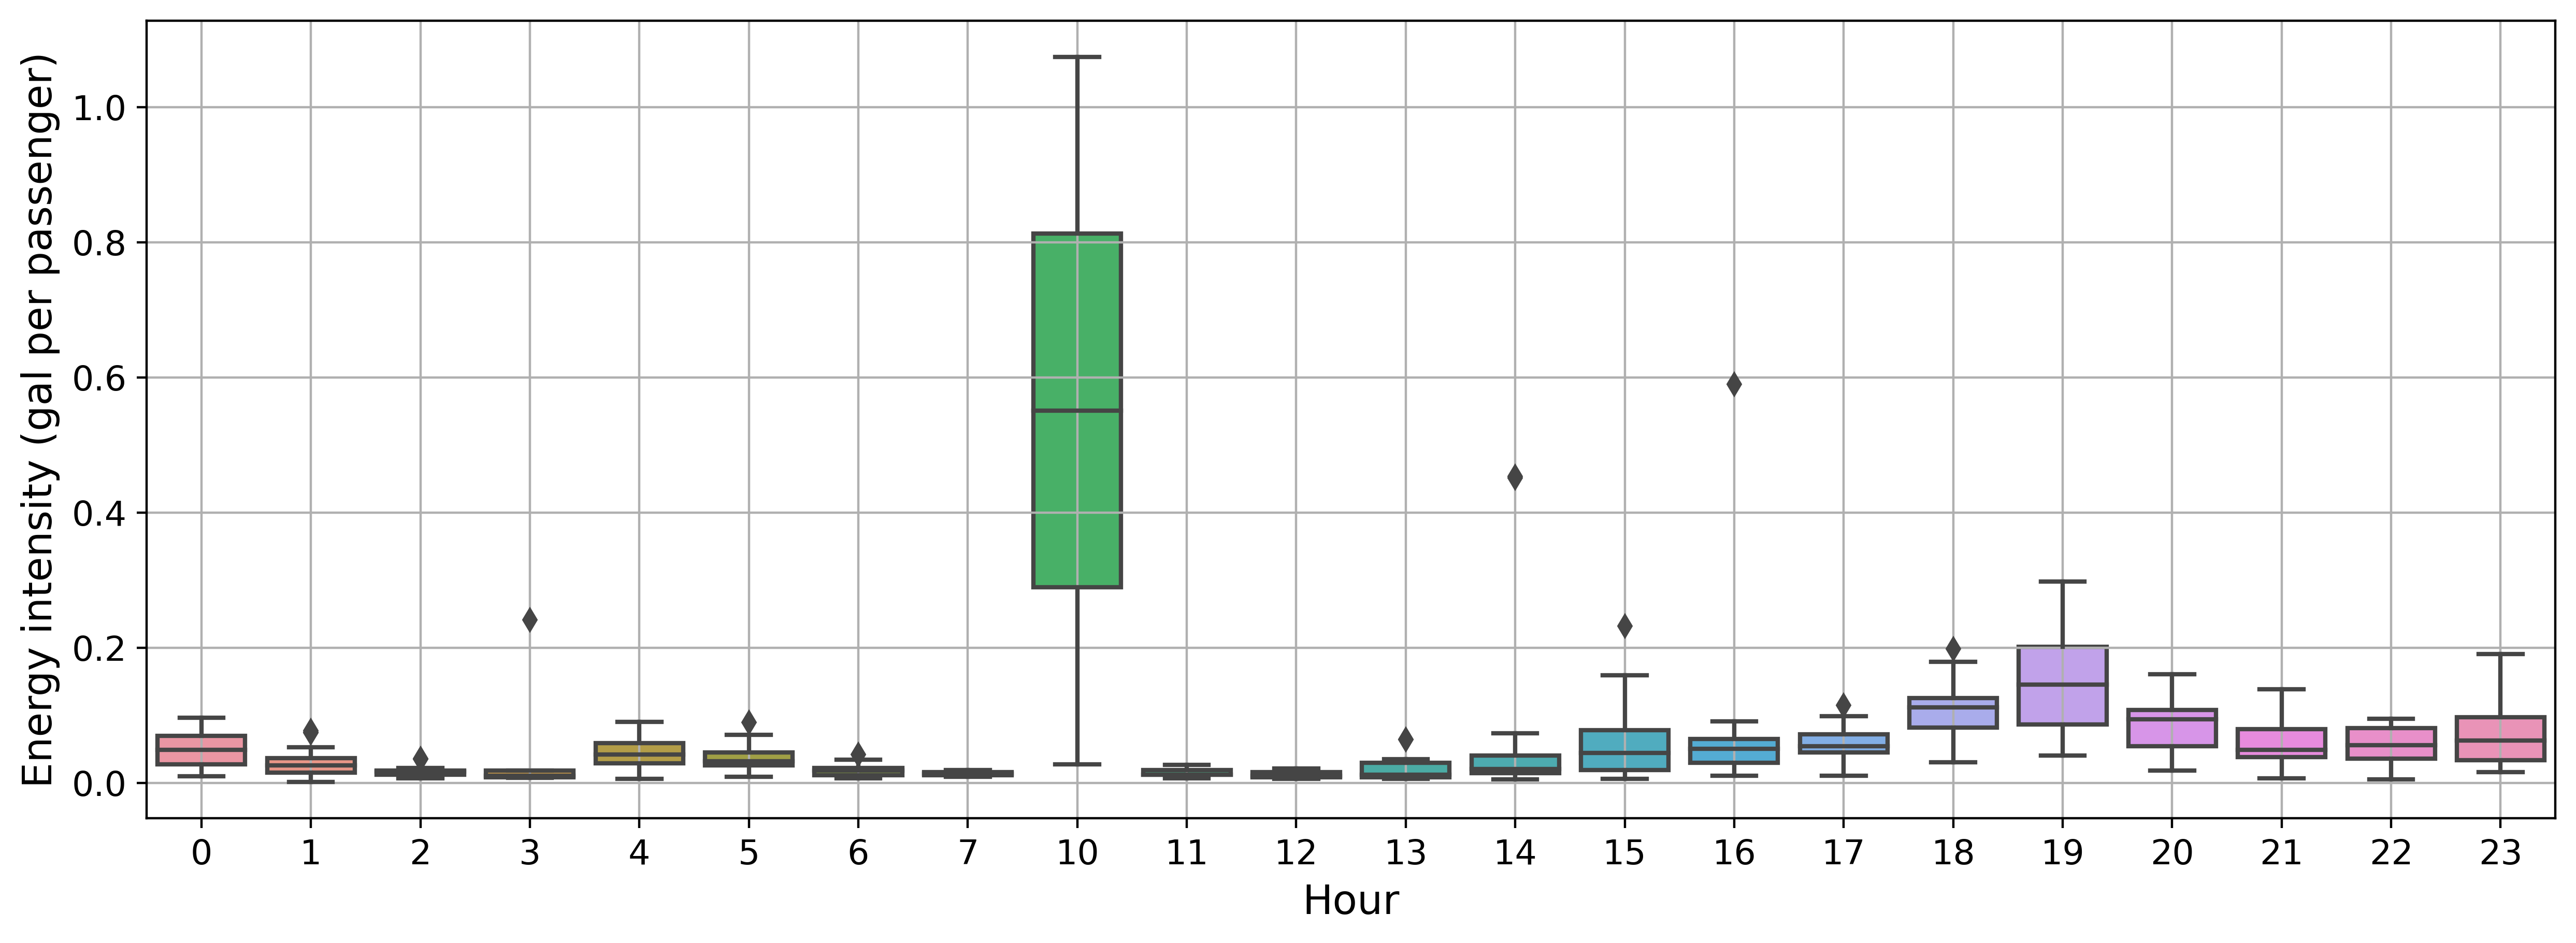

In [608]:
# Plot hourly energy intensity
fig, ax = plt.subplots(figsize=(15,5), dpi=400)
sns.boxplot(x='Hour', y='energy_intensity', data=df_integrated_diesel_hourly_plot)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Energy intensity (gal per passenger)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
fig.savefig(r'../../figures/intensity-hour.png', dpi=400, bbox_inches='tight')